# Analise dos dados da mare meteorologica da Praticagem

In [1]:
import pandas as pd
import numpy as np
import ttide as tt
import matplotlib.pylab as pl
#%matplotlib qt

In [2]:
# Carrega dados

dd = pd.read_csv('../data/proc/Praticagem_Mare_2016_int.csv', parse_dates=['date_hour'], index_col='date_hour')
dd.columns

Index([u'reg', u'regnr', u'prev', u'regnm'], dtype='object')

In [4]:
# analise de mare com ttide
# obtenção das constantes harmonicas

mare = tt.t_tide(dd['regnm'], dt=1, lat=np.array(-25))

-----------------------------------
nobs = 8784 
ngood = 8783 
record length (days) = 366.00
rayleigh criterion = 1.0

Phases at central time
x0= -0.000109  xtrend= 0
var(data)= 0.14    var(prediction)= 0.10    var(residual)= 0.04
var(prediction)/var(data) (%) = 72.9

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
  SA    0.0001141     0.0569     0.063    358.84     60.93      0.82
  SSA   0.0002282     0.0599     0.056    264.34     61.79       1.1
  MSM   0.0013098     0.0346     0.048    131.44    104.58      0.53
  MM    0.0015122     0.0062     0.042    282.33    243.09     0.022
  MSF   0.0028219     0.0286     0.052    183.66    108.87      0.31
  MF    0.0030501     0.0047     0.045     97.60    222.00     0.011
  ALP1  0.0343966     0.0034     0.004    357.72     74.71      0.89
* 2Q1   0.0357064     0.0066     0.005    213.01     33.78       2.1
  SIG1  0.0359087     0.0052     0.004     85.53     40.

In [5]:
# cria variaveis de previsao e residuo

dd['prev_ttide'] = mare['xout']
dd['resid'] = dd.regnm-mare['xout'].squeeze()
dd.head(3)

,reg,regnr,prev,regnm,prev_ttide,resid
date_hour,,,,,,
2016-01-01 00:00:00,1.860,0.640,0.5,-0.332952,-0.292477,-0.040475
2016-01-01 01:00:00,1.885,0.675,0.5,-0.297952,-0.343056,0.045104
2016-01-01 02:00:00,1.930,0.700,1.0,-0.272952,-0.314476,0.041524


In [6]:
# alisamento do residuo da mare

dd['resid1'] = dd.resid.rolling(window=12, center=True).mean()

pl.plot(dd.index, dd.resid) 
pl.plot(dd.index, dd.resid1)

In [7]:
# verifica mares positivas e negativas

# verifica valores positivos e negativos
a = np.sign(dd.resid1.values)

# identifica mudança de sinal positivo para negativo (vice-versa)
b = np.diff(a)

# acha os indices de virada na mare
indices = np.sort(np.array([list(pl.find(b < 0)) + list(pl.find(b > 0))])).T

/usr/local/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less
/usr/local/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater


In [8]:
# identifica data inicial e final da mare. duracao, media, max..

# pl.figure()
# pl.plot(dd.index, dd.resid1)
# pl.grid()

#tabela com as informacoes de cada evento da mare meteorologica
tabm = []

for i in range(len(indices)-1):
    
    mm = dd.resid1[indices[i][0]:indices[i+1][0]]
    
    data_ini = mm.index[0]
    data_fim = mm.index[-1]
    duracao = (data_fim - data_ini) / np.timedelta64(1, 'h') #horas      
    media = dd[data_ini:data_fim].resid1.mean()
    
    if media > 0:
        mmax = dd[data_ini:data_fim].resid1.max()
        data_max = mm.index[pl.find(mm.values == mmax)][0]
    else:
        mmax = dd[data_ini:data_fim].resid1.min()
        data_max = mm.index[pl.find(mm.values == mmax)][0]
    
        
    print ('\n ==== \n')
    print ('Data inicial: %s' %(data_ini))
    print ('Data final:   %s' %(data_fim))
    print ('Duracao:      %.1f' %(duracao))
    print ('Media:        %.2f' %(media))
    print ('Maximo:       %.2f' %(mmax))
    print ('Data maximo:  %s' %(data_max))
                                    
    
    tabm.append([data_ini, data_fim, duracao, media, mmax, data_max])
    

tabm = pd.DataFrame(np.array(tabm), columns=['data_ini', 'data_fim', 'duracao', 'media', 'mmax', 'data_max'])

#     pl.plot(mm.index, mm.values)
#     print (mm)
    


 ==== 

Data inicial: 2016-01-02 14:00:00
Data final:   2016-01-08 15:00:00
Duracao:      145.0
Media:        -0.30
Maximo:       -0.53
Data maximo:  2016-01-06 03:00:00

 ==== 

Data inicial: 2016-01-08 16:00:00
Data final:   2016-01-09 07:00:00
Duracao:      15.0
Media:        0.02
Maximo:       0.03
Data maximo:  2016-01-09 03:00:00

 ==== 

Data inicial: 2016-01-09 08:00:00
Data final:   2016-01-12 03:00:00
Duracao:      67.0
Media:        -0.08
Maximo:       -0.17
Data maximo:  2016-01-11 01:00:00

 ==== 

Data inicial: 2016-01-12 04:00:00
Data final:   2016-01-12 11:00:00
Duracao:      7.0
Media:        0.01
Maximo:       0.02
Data maximo:  2016-01-12 08:00:00

 ==== 

Data inicial: 2016-01-12 12:00:00
Data final:   2016-01-13 14:00:00
Duracao:      26.0
Media:        -0.05
Maximo:       -0.09
Data maximo:  2016-01-13 03:00:00

 ==== 

Data inicial: 2016-01-13 15:00:00
Data final:   2016-01-13 21:00:00
Duracao:      6.0
Media:        0.01
Maximo:       0.01
Data maximo:  2016-01

In [9]:
tabm

,data_ini,data_fim,duracao,media,mmax,data_max
0,2016-01-02 14:00:00,2016-01-08 15:00:00,145,-0.302218,-0.526679,2016-01-06 03:00:00
1,2016-01-08 16:00:00,2016-01-09 07:00:00,15,0.0187075,0.0289564,2016-01-09 03:00:00
2,2016-01-09 08:00:00,2016-01-12 03:00:00,67,-0.0848028,-0.171708,2016-01-11 01:00:00
3,2016-01-12 04:00:00,2016-01-12 11:00:00,7,0.00748378,0.0151433,2016-01-12 08:00:00
4,2016-01-12 12:00:00,2016-01-13 14:00:00,26,-0.0520077,-0.0938688,2016-01-13 03:00:00
5,2016-01-13 15:00:00,2016-01-13 21:00:00,6,0.00684297,0.0118472,2016-01-13 17:00:00
6,2016-01-13 22:00:00,2016-01-13 23:00:00,1,-0.000151751,-0.00228732,2016-01-13 23:00:00
7,2016-01-14 00:00:00,2016-01-14 02:00:00,2,0.00141083,0.00594686,2016-01-14 02:00:00
8,2016-01-14 03:00:00,2016-01-14 15:00:00,12,-0.0163652,-0.0264727,2016-01-14 06:00:00
9,2016-01-14 16:00:00,2016-01-16 04:00:00,36,0.0493248,0.099266,2016-01-15 13:00:00


In [10]:
from IPython.display import display, HTML


# display(tabm)

print tabm.to_html()

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>data_ini</th>
      <th>data_fim</th>
      <th>duracao</th>
      <th>media</th>
      <th>mmax</th>
      <th>data_max</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2016-01-02 14:00:00</td>
      <td>2016-01-08 15:00:00</td>
      <td>145</td>
      <td>-0.302218</td>
      <td>-0.526679</td>
      <td>2016-01-06 03:00:00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2016-01-08 16:00:00</td>
      <td>2016-01-09 07:00:00</td>
      <td>15</td>
      <td>0.0187075</td>
      <td>0.0289564</td>
      <td>2016-01-09 03:00:00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2016-01-09 08:00:00</td>
      <td>2016-01-12 03:00:00</td>
      <td>67</td>
      <td>-0.0848028</td>
      <td>-0.171708</td>
      <td>2016-01-11 01:00:00</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2016-01-12 04:00:00</td>
      <td>2016-01-12 11:00:00</td>
      <td

In [11]:
# busca informacoes na tabela

tabm
tabm.ix[pl.find(np.abs(tabm.mmax) == np.abs(tabm.mmax.max()))]

,data_ini,data_fim,duracao,media,mmax,data_max
117,2016-10-28 01:00:00,2016-10-30 06:00:00,53,0.45961,0.794701,2016-10-29 07:00:00


In [12]:
        data_max = mm.index[pl.find(mm.values == mmax)]
data_max[0]

Timestamp('2016-12-28 23:00:00')

In [13]:
str(data_max[0])

'2016-12-28 23:00:00'

In [14]:
# #calcula espectro

# a1 = '2016-01'
# a2 = '2016-12'

# dt = 1 / 24

# nfft = len(dd[a1:a2]) / 2
# fs = 1 / (1.0/24) #cpd

# # auto-espectro
# aa_regnm = espec.espec1(dd[a1:a2].regnm.values, nfft, fs)
# aa_prev = espec.espec1(dd[a1:a2].prev.values, nfft, fs)
# aa_meteo = espec.espec1(dd[a1:a2].resid.values, nfft, fs)
# # aa_ws = espec.espec1(vento[a1:a2].ws.values, nfft, fs)

# # espectro cruzado
# # aa2 = espec.espec2(vento[a1:a2].wd.values, dd[a1:a2].resid.values, nfft,  fs)

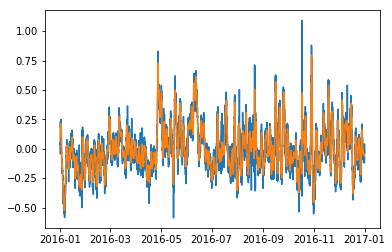

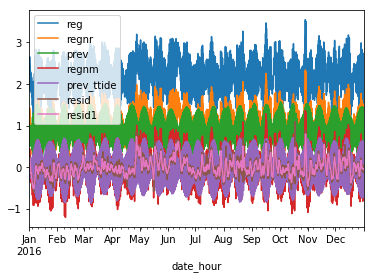

In [15]:
dd.plot()
pl.show()